In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt
import progressbar


random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  
    
five_examples = [100, 365, 9626, 10875, 11821]    
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]  

In [76]:
# we then look at the frequency domain of the 

def plot_fft(timeseries, machine_index):
    '''plot fft of timeseries'''
    
    yf = np.abs(np.fft.fft(timeseries))

    plt.figure(figsize = (16,4))            
    plt.plot(yf)  
    plt.title("FFT, Machine " + str(machine_index), fontsize = 18)  
    plt.xlabel("Frequency (1/sample)", fontsize = 16)  
    plt.ylabel("Magnitude", fontsize = 16)  
    plt.minorticks_on()
    plt.grid()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
                
    plt.savefig("figures//analysis//spectral//fft_" + str(machine_index))  
     
    plt.show()            
    return plt

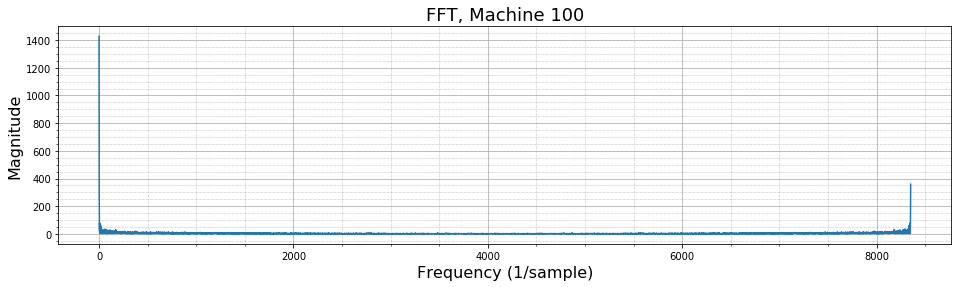

In [97]:
current_index = 0
fft_1 = plot_fft(full_cpu[five_examples[current_index]], five_examples[current_index])

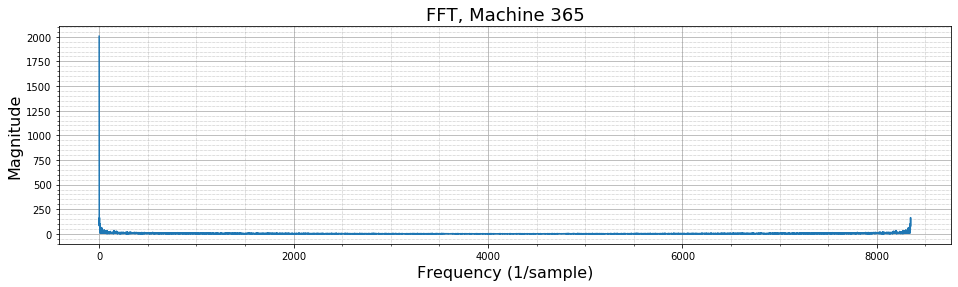

In [98]:
current_index = 1
fft_2 = plot_fft(full_cpu[five_examples[current_index]], five_examples[current_index])

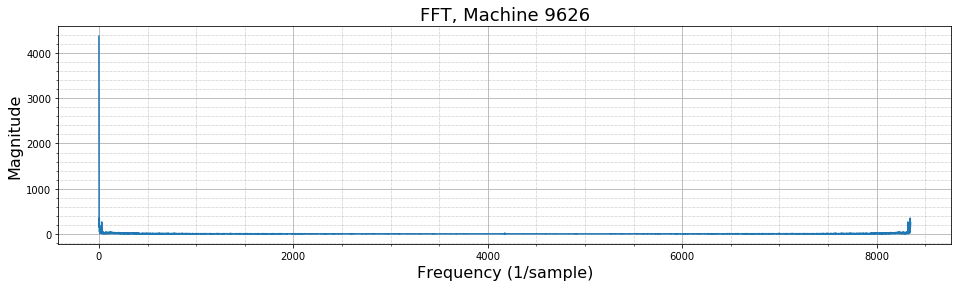

In [99]:
current_index = 2
fft_3 = plot_fft(full_cpu[five_examples[current_index]], five_examples[current_index])

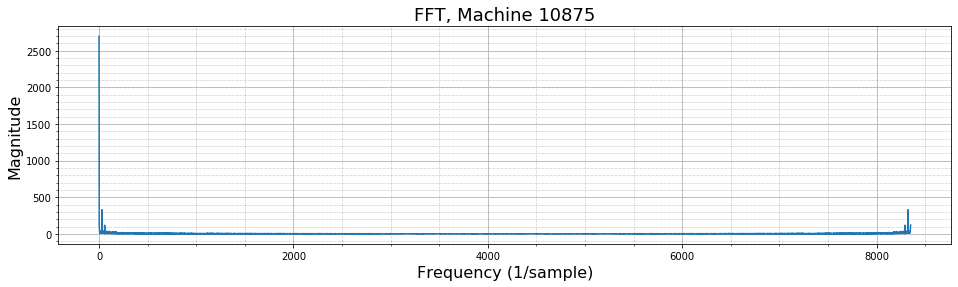

In [100]:
current_index = 3
fft_4 = plot_fft(full_cpu[five_examples[current_index]], five_examples[current_index])

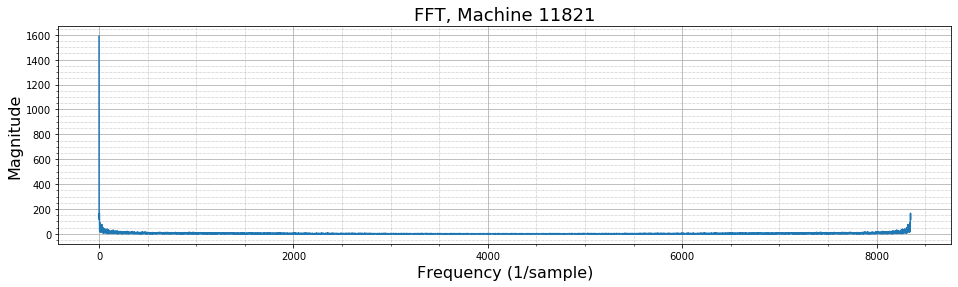

In [101]:
current_index = 4
fft_5 = plot_fft(full_cpu[five_examples[current_index]], five_examples[current_index])

In [62]:
def get_mean_fft(index_list):
    '''get the mean of fft of all machines in index_list'''
    
    fft_mapping = dict()
    
    with progressbar.ProgressBar(max_value = len(index_list)) as bar:
        for counter, index in enumerate(index_list):
            
            bar.update(counter)
            
            temp_fft = np.abs(np.fft.fft(full_cpu[index]))       
            fft_mapping[index] = temp_fft
    
    df_all_fft = pd.DataFrame(fft_mapping)
    
    return df_all_fft.mean(axis = 1)

In [67]:
mean_fft = get_mean_fft(np.arange(0,len(full_cpu)))

100% (12476 of 12476) |##################| Elapsed Time: 0:00:11 Time:  0:00:11


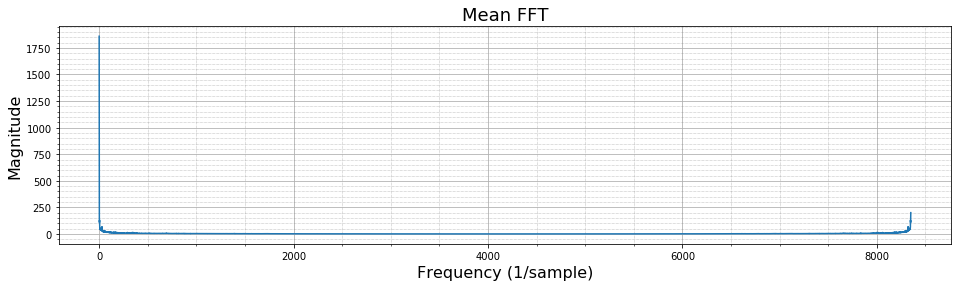

In [83]:
plt.figure(figsize = (16,4))            
plt.plot(mean_fft)  
plt.title("Mean FFT", fontsize = 18)  
plt.xlabel("Frequency (1/sample)", fontsize = 16)  
plt.ylabel("Magnitude", fontsize = 16)  
plt.minorticks_on()
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.savefig("figures//analysis//spectral//mean_fft")

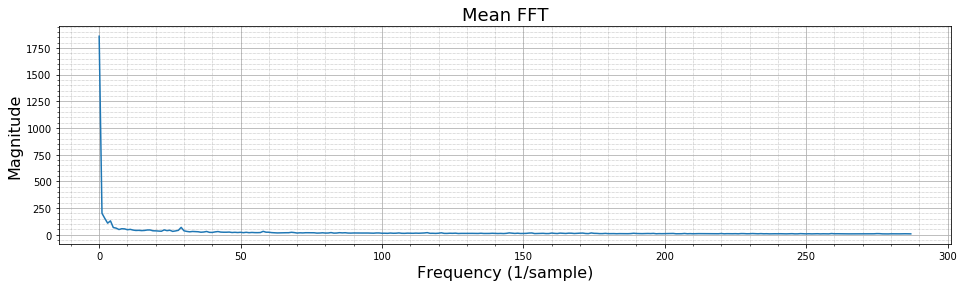

In [84]:
plt.figure(figsize = (16,4))            
plt.plot(mean_fft[0:288])  
plt.title("Mean FFT", fontsize = 18)  
plt.xlabel("Frequency (1/sample)", fontsize = 16)  
plt.ylabel("Magnitude", fontsize = 16)  
plt.minorticks_on()
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

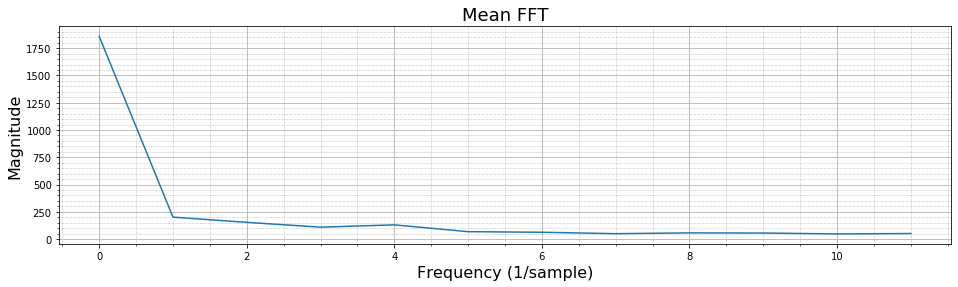

In [90]:
plt.figure(figsize = (16,4))            
plt.plot(mean_fft[0:12])  
plt.title("Mean FFT", fontsize = 18)  
plt.xlabel("Frequency (1/sample)", fontsize = 16)  
plt.ylabel("Magnitude", fontsize = 16)  
plt.minorticks_on()
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.savefig("figures//analysis//spectral//starting_fft")

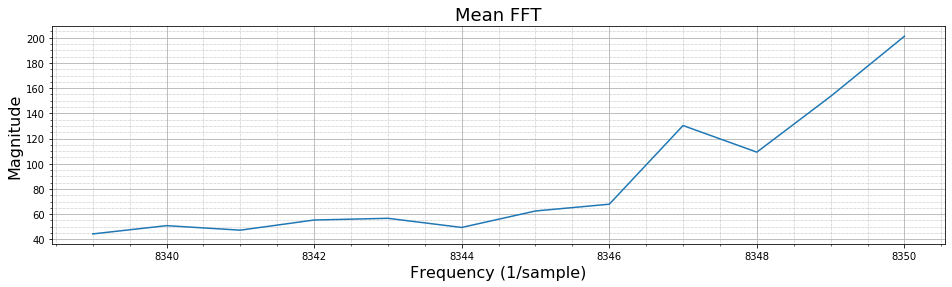

In [91]:
plt.figure(figsize = (16,4))   
last_segment = 12
plt.plot(np.arange(len(mean_fft) - last_segment, len(mean_fft)), mean_fft[-last_segment:])  
plt.title("Mean FFT", fontsize = 18)  
plt.xlabel("Frequency (1/sample)", fontsize = 16)  
plt.ylabel("Magnitude", fontsize = 16)  
plt.minorticks_on()
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.savefig("figures//analysis//spectral//last_fft")